In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
df = pd.read_csv("kindle_reviews.csv", index_col=0)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000F83SZQ,"[0, 0]",5,I enjoy vintage books and movies so I enjoyed ...,"05 5, 2014",A1F6404F1VG29J,Avidreader,Nice vintage story,1.399248e+09
1,B000F83SZQ,"[2, 2]",4,This book is a reissue of an old one; the auth...,"01 6, 2014",AN0N05A9LIJEQ,critters,Different...,1.388966e+09
2,B000F83SZQ,"[2, 2]",4,This was a fairly interesting read. It had ol...,"04 4, 2014",A795DMNCJILA6,dot,Oldie,1.396570e+09
3,B000F83SZQ,"[1, 1]",5,I'd never read any of the Amy Brewster mysteri...,"02 19, 2014",A1FV0SX13TWVXQ,"Elaine H. Turley ""Montana Songbird""",I really liked it.,1.392768e+09
4,B000F83SZQ,"[0, 1]",4,"If you like period pieces - clothing, lingo, y...","03 19, 2014",A3SPTOKDG7WBLN,Father Dowling Fan,Period Mystery,1.395187e+09


In [6]:
df.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [7]:
df.drop(columns=['asin', 'helpful', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'], inplace=True)
df.head()

,overall,reviewText
0,5,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...
2,4,This was a fairly interesting read. It had ol...
3,5,I'd never read any of the Amy Brewster mysteri...
4,4,"If you like period pieces - clothing, lingo, y..."


In [9]:
df = df.rename(columns={"overall": "Score", "reviewText": "Review"})
df.head()

,Score,Review
0,5,I enjoy vintage books and movies so I enjoyed ...
1,4,This book is a reissue of an old one; the auth...
2,4,This was a fairly interesting read. It had ol...
3,5,I'd never read any of the Amy Brewster mysteri...
4,4,"If you like period pieces - clothing, lingo, y..."


Análisis de los datos

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44976 entries, 0 to 44975
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Score     44976 non-null  int64 
 1   Review    44975 non-null  object
 2   ScoreMap  44976 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


<Axes: xlabel='overall'>

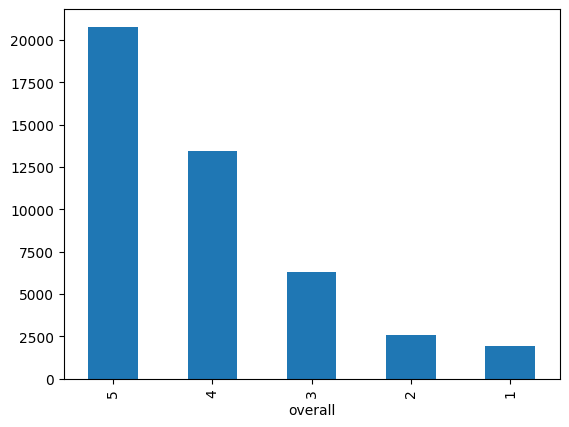

In [5]:
df['overall'].value_counts().plot(kind = 'bar')

In [ ]:
df['Score'].value_counts()

Score
1    337
5    172
3     71
Name: count, dtype: int64

In [ ]:
df['Score'].value_counts(normalize=True)

Score
1    0.581034
5    0.296552
3    0.122414
Name: proportion, dtype: float64

In [10]:
mapper={
    1:0,
    2:0,
    3:1,
    4:2,
    5:2,
}

df['ScoreMap'] = df['Score'].map(mapper)
#check if the change was made
df.head()

,Score,Review,ScoreMap
0,5,I enjoy vintage books and movies so I enjoyed ...,2
1,4,This book is a reissue of an old one; the auth...,2
2,4,This was a fairly interesting read. It had ol...,2
3,5,I'd never read any of the Amy Brewster mysteri...,2
4,4,"If you like period pieces - clothing, lingo, y...",2


<Axes: xlabel='ScoreMap'>

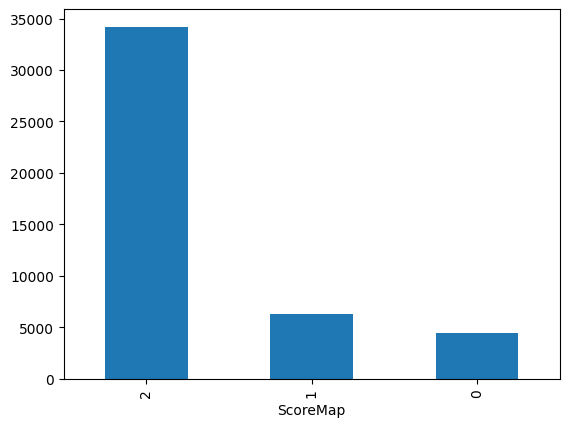

In [13]:
df['ScoreMap'].value_counts().plot(kind = 'bar')

In [15]:
from sklearn.utils import resample

df_class_0 = df[df.ScoreMap == 0]
df_class_1 = df[df.ScoreMap == 1]
df_class_2 = df[df.ScoreMap == 2]

min_size = len(df_class_0)

df_class_0_undersampled = resample(df_class_0, replace = False, n_samples = min_size, random_state = 123)
df_class_1_undersampled = resample(df_class_1, replace = False, n_samples = min_size, random_state = 123)
df_class_2_undersampled = resample(df_class_2, replace = False, n_samples = min_size, random_state = 123)

df_balanced = pd.concat([df_class_0_undersampled, df_class_1_undersampled, df_class_2_undersampled])

df = df_balanced
df['ScoreMap'].value_counts()

ScoreMap
0    4471
1    4471
2    4471
Name: count, dtype: int64

In [16]:
df.head()

,Score,Review,ScoreMap
38433,2,I give it 2 stars because it was short and cos...,0
87,2,"This is it, the big kahuna of newspapers deliv...",0
11745,1,"I like the premise of this book, and I read th...",0
15441,1,To say I am dissapointed in this short story w...,0
43195,1,I wasn't drawn into this short story. It was s...,0


In [17]:
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_en = stopwords.words('english')

from nltk import word_tokenize

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def limpiarCadena(cadena):
  resultado = []
  #Se agrega un espacio antes de cada mayúscula
  for char in cadena:
    if char.isupper():
      resultado.append(' ')
    resultado.append(char)
  resultado = ''.join(resultado)

  #Se quitan las mayúsculas
  resultado = resultado.lower()
  #Se quita la puntuación
  resultado = resultado.translate(str.maketrans("", "", string.punctuation))

  resultado = word_tokenize(resultado) #Se tokeniza
  resultado = [token for token in resultado if token not in stop_words_en] #Se quitan stopwords
  resultado = [lemmatizer.lemmatize(word) for word in resultado] #Se lemmatiza
  resultado = ' '.join(resultado) #Lo devolvemos a string

  return resultado

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
df.iloc[105, 1]

"This book is what I'd call a woman's brand-name-dropping, combination bodice-ripper mystery/thriller. Rather short on the mystery /thriller part.Beautiful, successful young woman (BSYW) with a fiance who wears Amani suits and Burbury coats and picks her up in a stretch limo returns to her hometown to care for an ailing parent and solve anold mystery. (stop me if you've heard this one.)BSYW stays at a B&B; decorated in Laura Ashley and Ralph Lauren and meets her new BFF. Of course there is the obligatory,  handsome, rude, mysterious , brooding stranger. We know where this is going.The assorted characters sit around in their brand-name, designer clothes, on brand-name furniture sipping their brand-name vintage wines from Baccarat glasses. There is the usual sophisticated picnic with french bread, cheese and a vintage brand-name wine. Just once I'd like someone to show up for a picnic with peanut-butter sandwiches and a thermos of koolaid.The book did have two surprises for me. I expecte

In [21]:
df['CleanReview'] = df['Review'].apply(limpiarCadena)
df.iloc[105, 3]

'book id call woman brandnamedropping combination bodiceripper mysterythriller rather short mystery thriller part beautiful successful young woman b w fiance wear amani suit burbury coat pick stretch limo return hometown care ailing parent solve anold mystery stop youve heard one b w stay b b decorated laura ashley ralph lauren meet new b f f course obligatory handsome rude mysterious brooding stranger know going assorted character sit around brandname designer clothes brandname furniture sipping brandname vintage wine baccarat glass usual sophisticated picnic french bread cheese vintage brandname wine id like someone show picnic peanutbutter sandwich thermos koolaid book two surprise expected cat end hanging closet gutted front step thought fraternal twin sister would turn russian orphan raised saintly murdered mother could say book full two surprise get book free pay 299 probably get money worth'

In [20]:
df.head()

,Score,Review,ScoreMap,CleanReview
38433,2,I give it 2 stars because it was short and cos...,0,give 2 star short cost 10 bought lame like nov...
87,2,"This is it, the big kahuna of newspapers deliv...",0,big kahuna newspaper delivered right kindle ev...
11745,1,"I like the premise of this book, and I read th...",0,like premise book read free preview little wor...
15441,1,To say I am dissapointed in this short story w...,0,say dissapointed short story would gross under...
43195,1,I wasn't drawn into this short story. It was s...,0,wasnt drawn short story strange entirely type ...


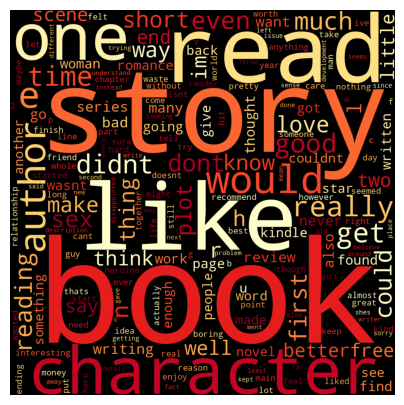

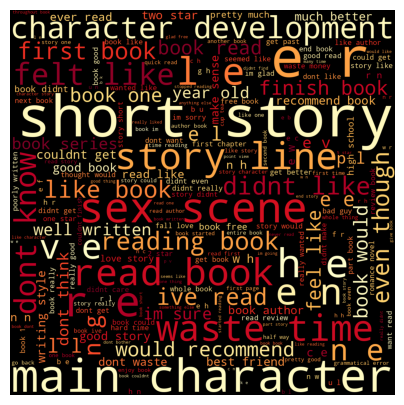

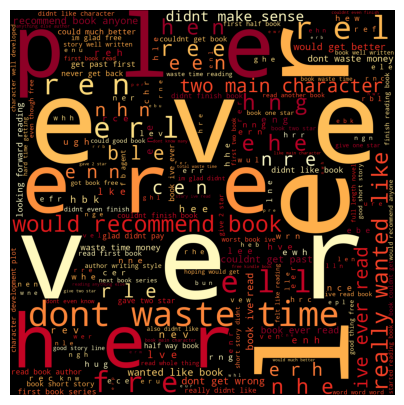

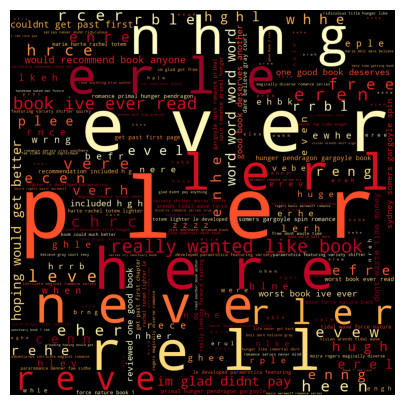

In [23]:
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

claseActual = 0

# we create a function that forms n grams for each text, it returns a Series (index, value)
def get_ngrams(num, texto):
    words = []
    for word in texto:
        n_grama = ngrams(word_tokenize(word), num)
        for ngram in n_grama: #Lo lleva de una lista a un string que appendea en words
            result =  ' '.join(ngram)
            words.append(result)
    return pd.Series(words).value_counts()

# we use a variable to store the Series
Score_One_1gram = get_ngrams(1,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'YlOrRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_One_1gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_One_2gram = get_ngrams(2,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'YlOrRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_One_2gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_One_3gram = get_ngrams(3,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'YlOrRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_One_3gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_One_4gram = get_ngrams(4,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'YlOrRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_One_4gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

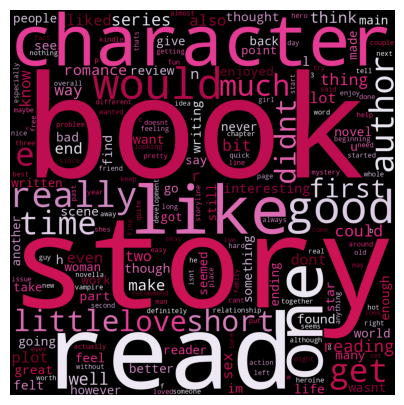

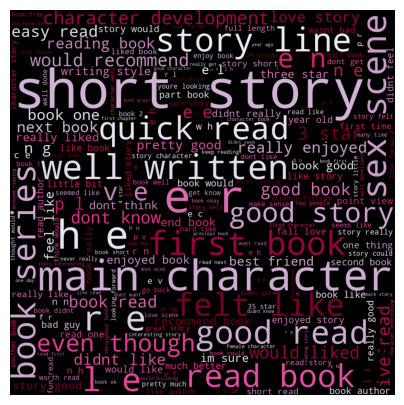

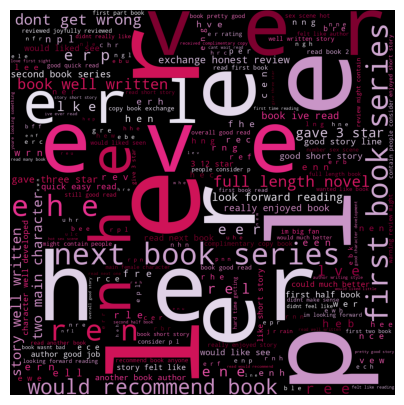

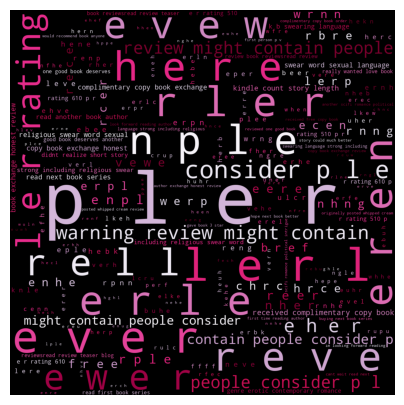

In [24]:
claseActual = 1

# we create a function that forms n grams for each text, it returns a Series (index, value)
def get_ngrams(num, texto):
    words = []
    for word in texto:
        n_grama = ngrams(word_tokenize(word), num)
        for ngram in n_grama: #Lo lleva de una lista a un string que appendea en words
            result =  ' '.join(ngram)
            words.append(result)
    return pd.Series(words).value_counts()

# we use a variable to store the Series
Score_Three_1gram = get_ngrams(1,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'PuRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Three_1gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Three_2gram = get_ngrams(2,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'PuRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Three_2gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Three_3gram = get_ngrams(3,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'PuRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Three_3gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Three_4gram = get_ngrams(4,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'PuRd',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Three_4gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

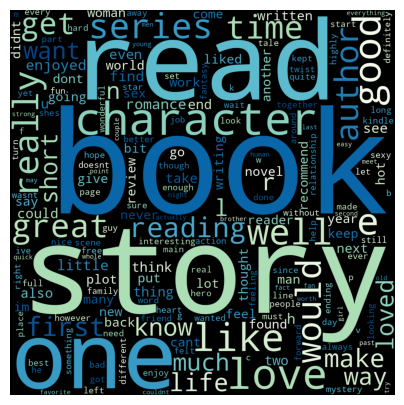

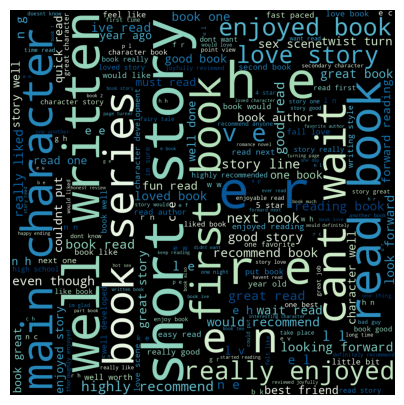

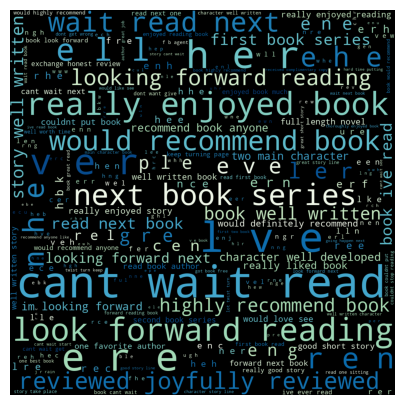

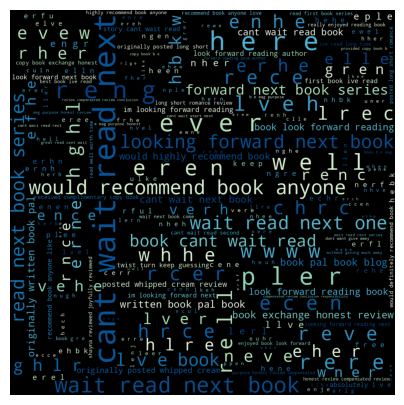

In [26]:
claseActual = 2

# we create a function that forms n grams for each text, it returns a Series (index, value)
def get_ngrams(num, texto):
    words = []
    for word in texto:
        n_grama = ngrams(word_tokenize(word), num)
        for ngram in n_grama: #Lo lleva de una lista a un string que appendea en words
            result =  ' '.join(ngram)
            words.append(result)
    return pd.Series(words).value_counts()

# we use a variable to store the Series
Score_Five_1gram = get_ngrams(1,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'GnBu',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Five_1gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Five_2gram = get_ngrams(2,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'GnBu',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Five_2gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Five_3gram = get_ngrams(3,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'GnBu',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Five_3gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# we use a variable to store the Series
Score_Five_4gram = get_ngrams(4,df[df['ScoreMap'] == claseActual]['CleanReview'])

#create wordcloud
wordcloud = WordCloud(
width = 1200,
height = 1200,
colormap = 'GnBu',
background_color = 'black',
stopwords = stopwords,
collocations = False,
min_font_size = 6).generate_from_frequencies(dict(Score_Five_4gram))
#wordcloud.to_image()

#show the word cloud.
plt.figure(figsize = (5,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 721.0 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [29]:
def vectorizarCadena(cadena):
  cadenaVectorizada = nlp(cadena).vector #transform text to a vector
  return cadenaVectorizada

In [30]:
df['VectorizedReview'] = df['CleanReview'].apply(vectorizarCadena)
df.head()

,Score,Review,ScoreMap,CleanReview,VectorizedReview
38433,2,I give it 2 stars because it was short and cos...,0,give 2 star short cost 10 bought lame like nov...,"[-1.48103, -3.7358253, -1.0577664, 1.0826459, ..."
87,2,"This is it, the big kahuna of newspapers deliv...",0,big kahuna newspaper delivered right kindle ev...,"[0.16536643, 0.59598976, -1.7151563, -0.284627..."
11745,1,"I like the premise of this book, and I read th...",0,like premise book read free preview little wor...,"[-0.051481783, 0.88139623, -1.4343452, -0.8939..."
15441,1,To say I am dissapointed in this short story w...,0,say dissapointed short story would gross under...,"[-0.5868717, -0.2864747, -0.35454103, -1.48550..."
43195,1,I wasn't drawn into this short story. It was s...,0,wasnt drawn short story strange entirely type ...,"[-2.084741, 0.12548304, -0.96144474, -3.059396..."


In [38]:
df = df.reset_index()
df.drop(columns = ["index"], inplace=True)
df.head()

,Score,Review,ScoreMap,CleanReview,VectorizedReview
0,2,I give it 2 stars because it was short and cos...,0,give 2 star short cost 10 bought lame like nov...,"[-1.48103, -3.7358253, -1.0577664, 1.0826459, ..."
1,2,"This is it, the big kahuna of newspapers deliv...",0,big kahuna newspaper delivered right kindle ev...,"[0.16536643, 0.59598976, -1.7151563, -0.284627..."
2,1,"I like the premise of this book, and I read th...",0,like premise book read free preview little wor...,"[-0.051481783, 0.88139623, -1.4343452, -0.8939..."
3,1,To say I am dissapointed in this short story w...,0,say dissapointed short story would gross under...,"[-0.5868717, -0.2864747, -0.35454103, -1.48550..."
4,1,I wasn't drawn into this short story. It was s...,0,wasnt drawn short story strange entirely type ...,"[-2.084741, 0.12548304, -0.96144474, -3.059396..."


In [39]:
from sklearn.manifold import TSNE

# we assign the values ​​of X and Y
X = df['VectorizedReview']
X = np.concatenate(X, axis = 0).reshape(-1,300)

# instantiate the TSNE model
modelo = TSNE(n_components =2)
#we adapt the data to the model
resultado = modelo.fit_transform(X)

df['tsne_1'] = resultado[:,0]
df['tsne_2'] = resultado[:,1]

df.head()

,Score,Review,ScoreMap,CleanReview,VectorizedReview,tsne_1,tsne_2
0,2,I give it 2 stars because it was short and cos...,0,give 2 star short cost 10 bought lame like nov...,"[-1.48103, -3.7358253, -1.0577664, 1.0826459, ...",-25.055819,-42.325520
1,2,"This is it, the big kahuna of newspapers deliv...",0,big kahuna newspaper delivered right kindle ev...,"[0.16536643, 0.59598976, -1.7151563, -0.284627...",31.113689,-20.137775
2,1,"I like the premise of this book, and I read th...",0,like premise book read free preview little wor...,"[-0.051481783, 0.88139623, -1.4343452, -0.8939...",29.368246,-24.658453
3,1,To say I am dissapointed in this short story w...,0,say dissapointed short story would gross under...,"[-0.5868717, -0.2864747, -0.35454103, -1.48550...",-38.722034,-21.707043
4,1,I wasn't drawn into this short story. It was s...,0,wasnt drawn short story strange entirely type ...,"[-2.084741, 0.12548304, -0.96144474, -3.059396...",17.272861,28.314241


In [40]:
import plotly.express as px
fig = px.scatter(data_frame=df,
                x = df['tsne_1'],
                y = df['tsne_2'],
                template = 'plotly_dark',
                hover_data=['Review'],
                color = df['Score'])

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [41]:
from sklearn.model_selection import train_test_split

X = df['VectorizedReview']
X = np.concatenate(X, axis = 0).reshape(-1, 300)
y = df['ScoreMap']

#separate training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=101, stratify=y)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
# we adjust training data so that it is valid for the model
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a variable to monitor the loss in the model
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=8,
                               restore_best_weights=True)
# we adjust training data so that it is valid for the model
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [43]:
#the "skeleton" of the model is initialized
model = Sequential()

#we add layers to the model
model.add(Dense(units=40, activation='relu', input_dim=300))
model.add(Dropout(0.2))
model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=3, activation='softmax'))

#compile the model
model.compile(optimizer= Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
#train model
history = model.fit(X_train,
                    y_train,
                    batch_size=50,
                    epochs=120,
                    validation_data=(X_test,  y_test),
                    callbacks=[early_stopping])

Epoch 1/120
54/54 [==============================] - 3s 22ms/step - loss: 1.1629 - accuracy: 0.3248 - val_loss: 1.1010 - val_accuracy: 0.3333
Epoch 2/120
54/54 [==============================] - 1s 15ms/step - loss: 1.1106 - accuracy: 0.3475 - val_loss: 1.0959 - val_accuracy: 0.3674
Epoch 3/120
54/54 [==============================] - 1s 17ms/step - loss: 1.1016 - accuracy: 0.3438 - val_loss: 1.0942 - val_accuracy: 0.3759
Epoch 4/120
54/54 [==============================] - 1s 17ms/step - loss: 1.1015 - accuracy: 0.3565 - val_loss: 1.0928 - val_accuracy: 0.3890
Epoch 5/120
54/54 [==============================] - 1s 13ms/step - loss: 1.0950 - accuracy: 0.3628 - val_loss: 1.0917 - val_accuracy: 0.3947
Epoch 6/120
54/54 [==============================] - 1s 10ms/step - loss: 1.0943 - accuracy: 0.3635 - val_loss: 1.0922 - val_accuracy: 0.3933
Epoch 7/120
54/54 [==============================] - 0s 9ms/step - loss: 1.0944 - accuracy: 0.3639 - val_loss: 1.0909 - val_accuracy: 0.3974
Epoch 8

In [45]:
# convert the metric to a dataframe
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.162942,0.324758,1.100998,0.333333
1,1.110611,0.347502,1.095881,0.367440
2,1.101638,0.343773,1.094179,0.375920
3,1.101478,0.356450,1.092817,0.388967
4,1.094960,0.362789,1.091662,0.394651


In [46]:
metrics.tail()

,loss,accuracy,val_loss,val_accuracy
115,0.880512,0.591350,0.889362,0.581679
116,0.880884,0.583520,0.889344,0.583450
117,0.884736,0.580910,0.890572,0.582704
118,0.872623,0.590231,0.894097,0.574224
119,0.881802,0.594333,0.889202,0.584102


<Axes: >

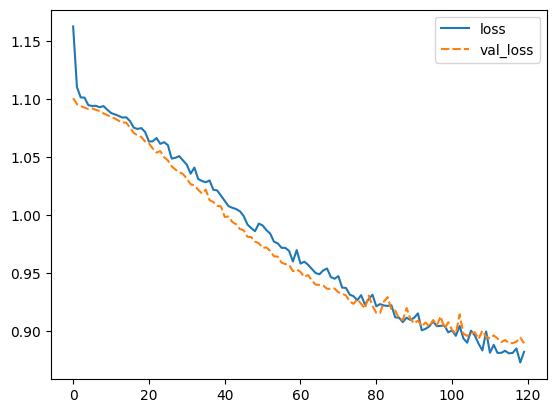

In [47]:
import seaborn as sns
# we graph the metrics (loss)
sns.lineplot(data=metrics[['loss', 'val_loss']])

<Axes: >

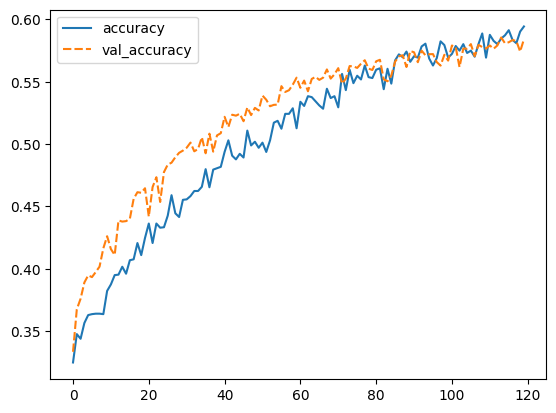

In [48]:
# we graph the metrics (accuracy)
sns.lineplot(data=metrics[['accuracy', 'val_accuracy']])

In [49]:
y_pred = model.predict(X_test) #  predict() function enables us to predict the labels of the data

# transform the data to create the classsification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)

#show classification report
target_names = ['1 Star', '3 Stars', '5 Stars']
print(classification_report(y_test, y_pred, target_names=target_names))

336/336 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

      1 Star       0.59      0.67      0.63      3577
     3 Stars       0.49      0.42      0.45      3577
     5 Stars       0.67      0.66      0.66      3577

    accuracy                           0.58     10731
   macro avg       0.58      0.58      0.58     10731
weighted avg       0.58      0.58      0.58     10731



In [50]:
y_test

array([0, 1, 1, ..., 0, 2, 2])

In [51]:
y_pred

array([0, 0, 1, ..., 0, 2, 2])

<Axes: >

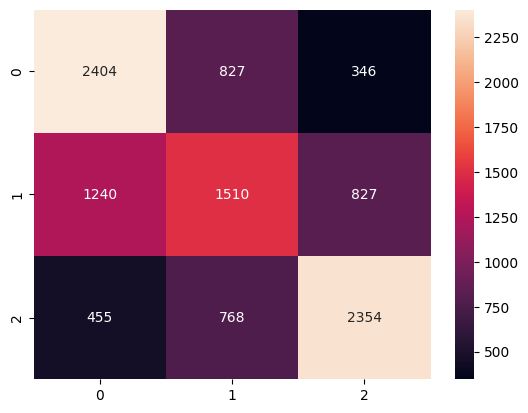

In [52]:
#shows the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='.0f')

In [53]:
X_train.shape

(2682, 300)

In [54]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

y_test = to_categorical(y_test, 3)

model = Sequential()

model.add(Conv1D(32,2, activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/200
84/84 [==============================] - 4s 28ms/step - loss: 1.1022 - accuracy: 0.3516 - val_loss: 1.0877 - val_accuracy: 0.4194
Epoch 2/200
84/84 [==============================] - 2s 24ms/step - loss: 1.0874 - accuracy: 0.3788 - val_loss: 1.0644 - val_accuracy: 0.4550
Epoch 3/200
84/84 [==============================] - 2s 24ms/step - loss: 1.0453 - accuracy: 0.4530 - val_loss: 1.0239 - val_accuracy: 0.4958
Epoch 4/200
84/84 [==============================] - 2s 26ms/step - loss: 1.0117 - accuracy: 0.4817 - val_loss: 0.9908 - val_accuracy: 0.5269
Epoch 5/200
84/84 [==============================] - 3s 41ms/step - loss: 0.9784 - accuracy: 0.4925 - val_loss: 0.9632 - val_accuracy: 0.5436
Epoch 6/200
84/84 [==============================] - 4s 49ms/step - loss: 0.9635 - accuracy: 0.5272 - val_loss: 0.9568 - val_accuracy: 0.5505
Epoch 7/200
84/84 [==============================] - 4s 49ms/step - loss: 0.9488 - accuracy: 0.5336 - val_loss: 0.9580 - val_accuracy: 0.5239
Epoch 

In [56]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.102219,0.351603,1.087695,0.419439
1,1.087425,0.378822,1.064415,0.455037
2,1.045335,0.453020,1.023945,0.495760
3,1.011745,0.481730,0.990821,0.526885
4,0.978382,0.492543,0.963185,0.543565


In [57]:
metrics.tail()

,loss,accuracy,val_loss,val_accuracy
29,0.806501,0.608874,0.889617,0.586525
30,0.811595,0.607010,0.890000,0.572826
31,0.817340,0.619687,0.919456,0.571429
32,0.817221,0.606637,0.890344,0.584382
33,0.793243,0.629381,0.902389,0.586339


<Axes: >

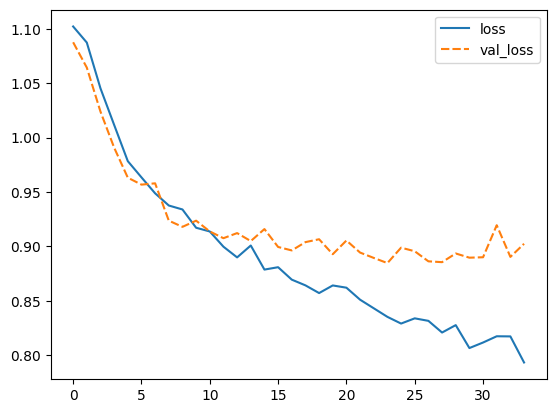

In [58]:
import seaborn as sns
# we graph the metrics (loss)
sns.lineplot(data=metrics[['loss', 'val_loss']])

<Axes: >

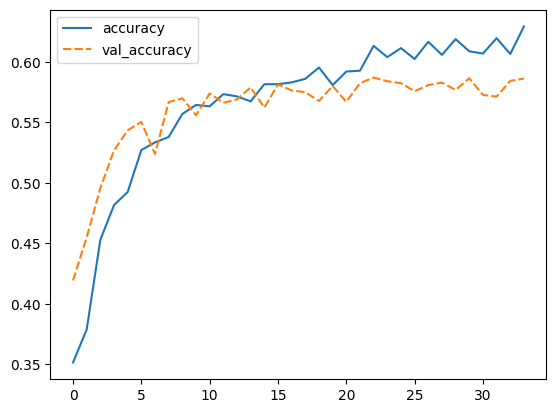

In [59]:
sns.lineplot(data=metrics[['accuracy', 'val_accuracy']])

In [60]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)
target_names = ['1 Star', '3 Stars', '5 Stars']
print(classification_report(y_test, y_pred, target_names=target_names))


336/336 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

      1 Star       0.58      0.69      0.63      3577
     3 Stars       0.52      0.34      0.41      3577
     5 Stars       0.63      0.72      0.67      3577

    accuracy                           0.58     10731
   macro avg       0.57      0.58      0.57     10731
weighted avg       0.57      0.58      0.57     10731



In [61]:
y_test

array([0, 1, 1, ..., 0, 2, 2])

In [62]:
y_pred

array([0, 0, 1, ..., 0, 2, 2])

<Axes: >

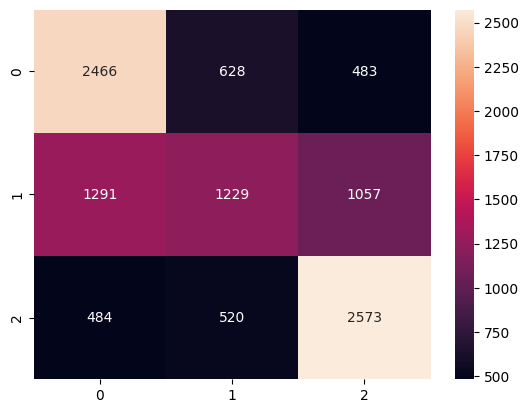

In [63]:
#shows the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt='.0f')

In [69]:
def predecirClase(text):
  cleanText = limpiarCadena(text)
  vectorizedText = vectorizarCadena(cleanText)
  vectorizedText = vectorizedText.reshape(1,-1)
  vectorizedText = scaler.transform(vectorizedText)
  vectorizedText = vectorizedText.reshape(1,300,1) #transforms the structure of the text to be able to use it in the predict function

  prediccion = model.predict(vectorizedText)
  print(f'''
  Category\t Probability
  -----------------------
  1-2 STAR:\t {prediccion[0][0]}
  3 STARS:\t {prediccion[0][1]}
  4-5 STARS:\t {prediccion[0][2]}
  ''')

In [81]:
"""
5 STARS    [0,171] 172 total
3 STARS    [172,242] 71 total
1 STARS    [243,579] 337 total

Interesantes: 242,

"""
numReview = 8946
miReview = df.iloc[numReview,1]
print(miReview)
print()
predecirClase(miReview)
print("Real category: ", df.loc[numReview,"Score"])

I agree with one of the reviewers, this book gave me nightmares, but I can live with them. The anti-hero Max Chase is the handy man for the resort. The waitress Sharon Brennan and her daughter Glory live at the  Pass Island resort. Max has a past and as a Category Five hurricane is fast approaching, the resort is suddenly invaded by villains, willing to kill for an mysterious object at the resort. Good book for mystery lovers.

1/1 [==============================] - 0s 62ms/step

  Category	 Probability
  -----------------------
  1-2 STAR:	 0.05678793415427208
  3 STARS:	 0.17978517711162567
  4-5 STARS:	 0.7634268999099731
  
Real category:  4


In [83]:
miReview = "...If you're into falling asleep. Picked it up and put it down way too many times. B-O-R-I-N-G! Was hoping it would be a good alternative to Vince Flynn's, Mitch Rapp series. I was sorely disappointed."
print(miReview)
print()
predecirClase(miReview)

...If you're into falling asleep. Picked it up and put it down way too many times. B-O-R-I-N-G! Was hoping it would be a good alternative to Vince Flynn's, Mitch Rapp series. I was sorely disappointed.

1/1 [==============================] - 0s 52ms/step

  Category	 Probability
  -----------------------
  1-2 STAR:	 0.25029289722442627
  3 STARS:	 0.5153189897537231
  4-5 STARS:	 0.2343880981206894
  


In [82]:
df.shape

(13413, 7)

In [80]:
df_test = df[df.Score == 4]
df_test.head()

,Score,Review,ScoreMap,CleanReview,VectorizedReview,tsne_1,tsne_2
8946,4,"I agree with one of the reviewers, this book g...",2,agree one reviewer book gave nightmare live an...,"[-0.45893884, 0.51345325, -1.3375598, -1.19744...",-5.087731,-24.466894
8954,4,I just finished Nightmare Within and it was a ...,2,finished nightmare within great reintroduction...,"[0.017207425, 0.25394404, -1.4536942, -1.37628...",6.747423,-12.561053
8963,4,"I've read some erotic stories, and I believe t...",2,ive read erotic story believe well written one...,"[-0.1922437, 0.7580413, -1.9194558, -1.8214644...",33.117188,-5.578254
8966,4,This was a quick little peek at the Angels ser...,2,quick little peek angel series nalini singh ch...,"[0.41499794, -0.15840846, 0.16712569, -0.87327...",-25.391386,-36.731106
8967,4,"All Lycan's EveCallie a 40 year old divorced, ...",2,lycans eve callie 40 year old divorced single ...,"[-0.122405306, 1.2824426, -1.5630785, -0.93284...",-0.443633,-16.505001
